In [1]:
import cv2
import face_recognition
import matplotlib.pyplot as plt

# img = cv2.imread('Images/Elon_Musk.jpg',-1)
# plt.figure()
# plt.imshow(img)

imgElon = face_recognition.load_image_file('Images/Elon_Musk.jpg')
imgElon = cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB) #converting it to RGB
imgTest = face_recognition.load_image_file('Images/Elon_test.jpeg')
imgTest = cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB) 

# plt.figure()
# plt.imshow(imgElon)
# plt.figure()
# plt.imshow(imgTest)
# cv2.waitKey(0)


# cv2.imshow('Elon Musk',imgElon)
# cv2.imshow('Elon Test',imgTest)
# cv2.waitKey(0)

# cv2.namedWindow("output", cv2.WINDOW_NORMAL)    # Create window with freedom of dimensions                    # Read image
# imS = cv2.resize(imgElon, (960, 540))                # Resize image
# cv2.imshow("Elon Musk", imS)                       # Show image
# cv2.waitKey(0)                                  # Display the image infinitely until any keypress



(426, 2022, 1224, 1224)


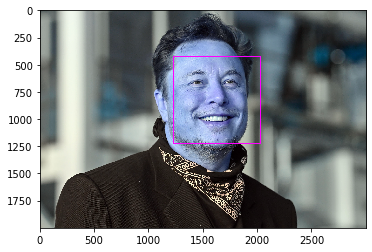

In [2]:
#Step2:Find faces in image and find their encoding as well



faceLoc = face_recognition.face_locations(imgElon)[0] #we are sending only a single image so we will get the first element of it
encodeElon = face_recognition.face_encodings(imgElon)[0]
#encoding the face 
cv2.rectangle(imgElon,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2)
print(faceLoc)
#prints top right bottom and left

plt.figure()
plt.imshow(imgElon)
# cv2.waitKey(0)

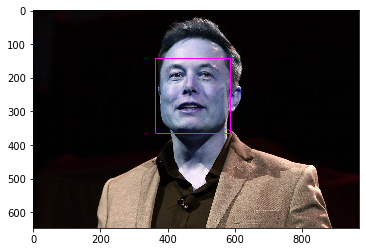

In [3]:
faceLocTest = face_recognition.face_locations(imgTest)[0]
#here just to see where the face is located whether it is located properly or not
encodeTest = face_recognition.face_encodings(imgTest)[0]

cv2.rectangle(imgTest,(faceLocTest[3],faceLocTest[0]),(faceLocTest[1],faceLocTest[2]),(255,0,255),2)
 
# plt.figure()
# plt.imshow(imgElon)
plt.figure()
plt.imshow(imgTest)


[True] [0.49894594]


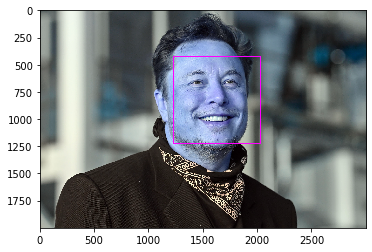

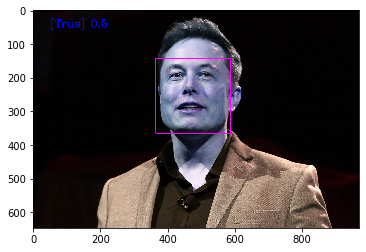

In [4]:
#Step 3: comparing these faces and finding the distance between them.

#we are getting the encodings of elon and encodings for test image
# and then we are going to compare these encodings (128 measurements for both the faces)

#at the backend we will use linear SVM to find out whether they match or not 
results = face_recognition.compare_faces([encodeElon],encodeTest)
#here we have to give the list of known faces but rigth now we have only one face that is encodeElon so there is only single element in the list

#sometimes we have a lot of images and there can be similarities so what you want to find out is how similar these images are,
#so you might want to find the best match
#to do that we will find the distance 
faceDis = face_recognition.face_distance([encodeElon],encodeTest)
#here also we have to pass a list
#the lower the distance the better the match is 
print(results,faceDis)

cv2.putText(imgTest,f'{results} {round(faceDis[0],2)}',(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
#putting the result and face distance on image and rounding off the distance to two decimal places

# cv2.imshow('Elon Musk',imgElon)
# cv2.imshow('Elon Test',imgTest)
# cv2.waitKey(0)

# cv2.namedWindow("output", cv2.WINDOW_NORMAL)    # Create window with freedom of dimensions                    # Read image
# img1 = cv2.resize(imgElon, (960, 540))  # Resize image
# cv2.imshow("Elon Musk", img1)    # Show image
# img2 = cv2.resize(imgTest,(960,540))
# cv2.imshow("Elon_test",img2)
 
    
plt.figure()
plt.imshow(imgElon)
plt.figure()
plt.imshow(imgTest)


In [ ]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime
# from PIL import ImageGrab

In [2]:
path = 'ImagesAttendance'
images = []
classNames = []
myList = os.listdir(path)
print(myList)
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)

FileNotFoundError: [Errno 2] No such file or directory: 'ImagesAttendance'

In [3]:
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

In [4]:
 
def markAttendance(name):
    with open('Attendance.csv','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtString = now.strftime('%H:%M:%S')
            f.writelines(f'\n{name},{dtString}')

In [5]:
#### FOR CAPTURING SCREEN RATHER THAN WEBCAM
# def captureScreen(bbox=(300,300,690+300,530+300)):
#     capScr = np.array(ImageGrab.grab(bbox))
#     capScr = cv2.cvtColor(capScr, cv2.COLOR_RGB2BGR)
#     return capScr
 
encodeListKnown = findEncodings(images)
print('Encoding Complete')
 
cap = cv2.VideoCapture(0)

Encoding Complete


In [6]:
while True:
    success, img = cap.read()
    #img = captureScreen()
    imgS = cv2.resize(img,(0,0),None,0.25,0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
 
    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS,facesCurFrame)
 
    for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
        #print(faceDis)
        matchIndex = np.argmin(faceDis)
 
        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            #print(name)
            y1,x2,y2,x1 = faceLoc
            y1, x2, y2, x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
            cv2.putText(img,name,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
            markAttendance(name)
 
    cv2.imshow('Webcam',img)
    cv2.waitKey(1)


ValueError: attempt to get argmin of an empty sequence